In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.0001]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(a)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

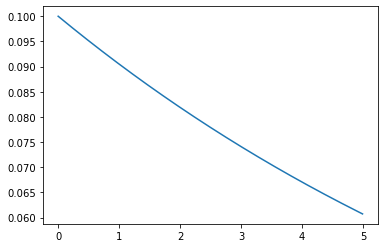

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 5, 0.01)

In [4]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

In [5]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121 

In [6]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

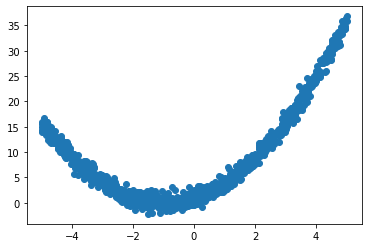

In [7]:
draw_data(data)

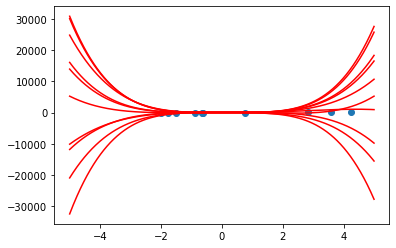

In [8]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num):
    mus = []

    lambda_dist = gen_lambda_dist()
    lmds = lambda_dist.rvs(num)

    for mld in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data[:num], mus)
    
    plt.show()
   
draw_estimates(10)

In [9]:
def update(data):
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[i][1]*ph_vecs[i] for i in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[1]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[1].T, gauss_lambda[1]) , mu[1] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

In [10]:
datanum = 100

update(data[:datanum])

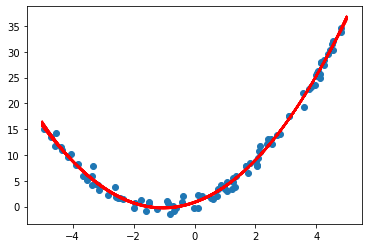

In [11]:

    
draw_estimates(100)

In [12]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 8.18834116e-01],
        [ 2.07150635e+00],
        [ 1.01052469e+00],
        [-3.79748484e-04],
        [ 3.86524182e-04]])]

In [13]:
a

[1, 51.0]

In [14]:
b

[0.1, 39.70552930862468]

In [15]:
1/np.sqrt(lmd)

array([0.31621083])

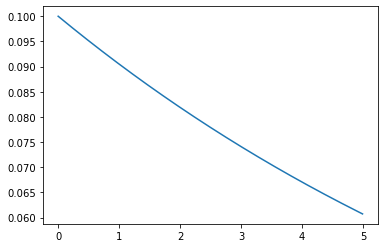

In [16]:
draw(lambda_dist, 0, 5, 0.01)

In [17]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data

[[-3.2588695644542387, 5.412560191838765],
 [-0.21576591332763462, 0.6308245326086995],
 [1.7534568530619132, 7.0061494479994915],
 [-0.2344913643979074, 1.4133571130805151],
 [-3.490081363626346, 6.253434654842787],
 [4.158313832203467, 26.2039056774936],
 [4.5636244722121875, 31.17047969182392],
 [2.3696442996253184, 10.86671378182013],
 [-3.2084142752859526, 5.183752851284136],
 [2.053334445163623, 9.330640585140593],
 [-0.7882374205502007, 1.1787675697446438],
 [2.6035361117790687, 12.987307963211027],
 [2.2889659225197976, 10.76568815888888],
 [-2.7652135384386947, 3.0232327303278326],
 [-4.549311831698798, 12.512714883848334],
 [4.352360806350899, 27.79802232754032],
 [4.715263102926318, 31.748026873931458],
 [-3.484804353805661, 5.673049926749142],
 [-3.6255990909552684, 6.738612720697547],
 [3.632901418248041, 23.46584425551255],
 [-0.3927269748627882, 0.09244458872012429],
 [-4.939148000732633, 15.524572937433895],
 [3.7713002096896675, 21.9162646291563],
 [-4.209275289923165,